<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
First Semester, 2020-21
</center></h1>

<h2><center>Assignment 2 – PS2 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course.</li>
  <li>All your visuals should be adequately labelled.</li>
  <li>Fill in the below asked information.</li>
</ol>

<h3>Objective</h3>
<h4>Explore and analyze air quality data to understand how it is affecting the cities.</h4>




##  Download and Prep the Data: 3 Marks

<h4>Import the libraries needed</h4>

In [69]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Load data and store in dataframe </h4>

In [70]:
#Load the data into the dataframe using pandas
df = pd.read_csv("dvi-a2-ps2-data.csv")

In [71]:
#View the dataframe
df

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [72]:
#List the columns
df.columns

Index(['city', 'country', 'date.utc', 'location', 'parameter', 'value',
       'unit'],
      dtype='object')

In [73]:
#Describe the dataset
df.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [74]:
#Getting the info of datatypes and the variables present in it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226814CC248>]],
      dtype=object)

<Figure size 864x1152 with 0 Axes>

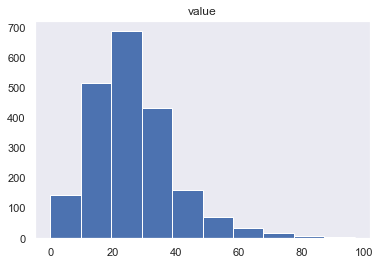

In [75]:
#performing an EDA for the dataset
plt.figure(figsize=(12,16))
df.hist(grid=False)

## Data Cleaning

Fill the missing value for the continous variables(eg: Mean) for proper data visualization

In [76]:
#Finding any missing values in the dataset
df.isna().sum()

city         0
country      0
date.utc     0
location     0
parameter    0
value        0
unit         0
dtype: int64

In [77]:
#Find the null values as well
df.isnull().sum()

city         0
country      0
date.utc     0
location     0
parameter    0
value        0
unit         0
dtype: int64

In [78]:
# remove data that we didn't require further
df.drop(['parameter','unit'],axis=1,inplace=True)

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>What kind of a correlation exists between Air quality across the cities found.<br><br>
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual <br><br>
    1.The reason for selecting the chart type you did in a markdown cell below

In [79]:
# Find the correlation between the cities and NO2 emissions
# Cities was a categorical data so need to change them to Nominal data
from sklearn.preprocessing import OrdinalEncoder

df_for_corr = df.copy()
ord = OrdinalEncoder()
df_for_corr["city"] = ord.fit_transform(df_for_corr[["city"]])
df_for_corr.head()

,city,country,date.utc,location,value
0,2.0,FR,2019-06-21 00:00:00+00:00,FR04014,20.0
1,2.0,FR,2019-06-20 23:00:00+00:00,FR04014,21.8
2,2.0,FR,2019-06-20 22:00:00+00:00,FR04014,26.5
3,2.0,FR,2019-06-20 21:00:00+00:00,FR04014,24.9
4,2.0,FR,2019-06-20 20:00:00+00:00,FR04014,21.4


In [80]:
#find the correlation matrix
df_corr = df_for_corr.corr(method='kendall')
df_corr

,city,value
city,1.000000,0.028802
value,0.028802,1.000000


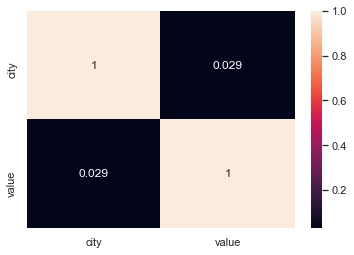

In [81]:
#Plot correlation matrix
sns.set(font_scale = 1)
plt.figure()
sns.heatmap(df_corr,vmax=1,annot=True)

Text(0.5, 1.0, 'Line Plot For Variation Of Air Quality In Regular Intervals Of Time')

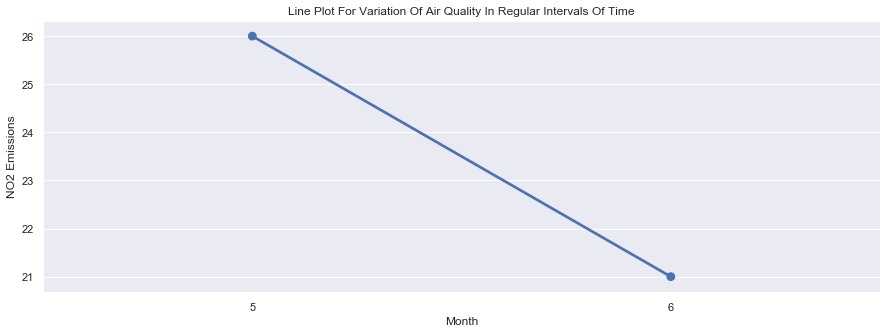

In [82]:
# change the object type into datetime dataframe
df['date.utc']=pd.to_datetime(df['date.utc'])
df['year']=df['date.utc'].dt.year
df['month']=df['date.utc'].dt.month

df_groupby_airQuality_Year = df.groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
df_groupby_airQuality_Month = df.groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)

f,ax=plt.subplots(figsize=(15,5))
plt.xticks(rotation=0)
sns.pointplot(x='month', y='value', data=df_groupby_airQuality_Month)
plt.xlabel("Month")
plt.ylabel("NO2 Emissions")
plt.title("Line Plot For Variation Of Air Quality In Regular Intervals Of Time")

Text(0.5, 1.0, 'Bar Plot To Check Which Country Had Maximum NO2 Emissions')

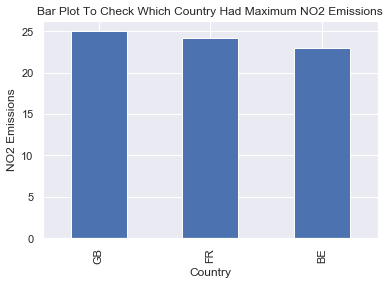

In [83]:
df_group_by_country_Airquality = df.groupby([df['country']])['value'].median().sort_values(ascending =False) 
df_group_by_country_Airquality.plot.bar(color='b')

plt.ylabel("NO2 Emissions")
plt.xlabel("Country")
plt.title("Bar Plot To Check Which Country Had Maximum NO2 Emissions")

Text(0.5, 1.0, 'Bar Plot To Check Which City Had Maximum NO2 Emissions')

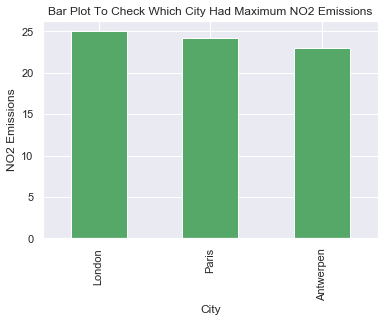

In [84]:
df_group_by_city_Airquality = df.groupby([df['city']])['value'].median().sort_values(ascending =False) 
df_group_by_city_Airquality.plot.bar(color='g')

plt.ylabel("NO2 Emissions")
plt.xlabel("City")
plt.title("Bar Plot To Check Which City Had Maximum NO2 Emissions")

**Reason:**

- Both Country and City are categorical variables<br><br>
- The median value of NO2 emission is used to check the relationship between the cities and emissions value.

### Question 2
<h4>Show the no2 conconcentration city wise for the date entire range for all the cities.<br><br>
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual <br><br>1.Your observation about the relationship of no2 concentration in different different cities.<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below

Text(0.5, 1.0, 'NO2 Concentration City Wise For All The Cities')

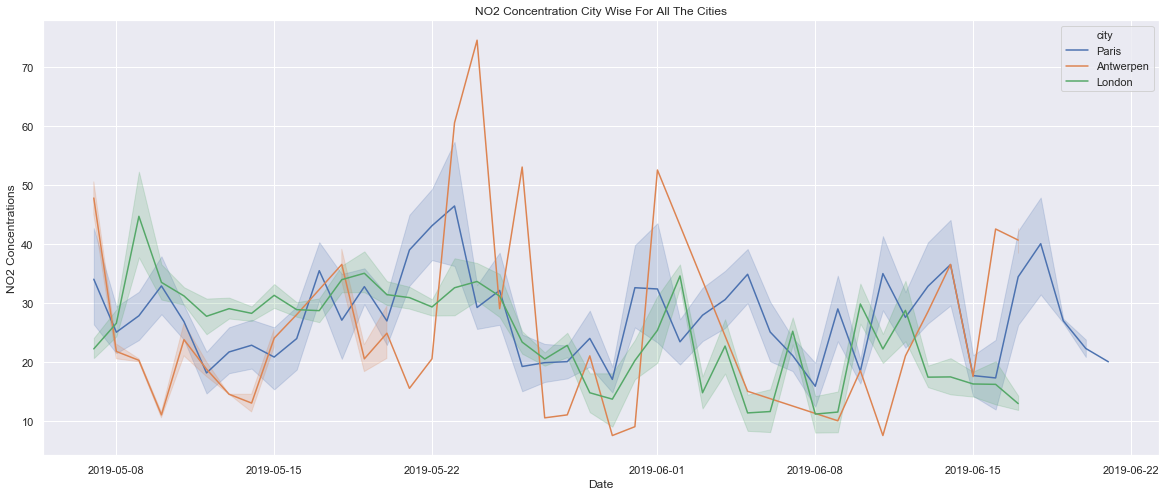

In [85]:
df['date_new'] = df['date.utc'].dt.date
df['date_new'] = pd.to_datetime(df['date_new'], format='%Y-%m-%d')
plt.figure(figsize=(20,8))
sns.lineplot(x='date_new', y='value',hue='city', data=df)
plt.xlabel('Date')
plt.ylabel('NO2 Concentrations')
plt.title('NO2 Concentration City Wise For All The Cities')

**Reason:**

-  The line plot was used to study the effect of emissions over a continous range of dates.
-  Both the emissions values and dates can be treated as continous variables. So, We can see that Antwerpen has the highest range of emisson values and London has the lowest range of emisson values

### Question 3
<h4>How does the no2 varies across the day across the cities. Is there a change at day versus night across the cities?<br>
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual<br><br>
    1.The reason for selecting the chart type you did in a markdown cell below
    

In [86]:
df['date.utc'] = pd.to_datetime(df['date.utc'])
df['time'] = df['date.utc'].dt.time
df['date_new'] = pd.to_datetime(df['date_new'], format='%Y-%m-%d')
#starting date : 2019-06-01
df2 = df.loc[df['date_new'] == "2019-06-01"]
df2['time'] = df2['time'].astype(str)

C:\Users\jayad\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'The NO2 Varies Across The Day Across The Cities')

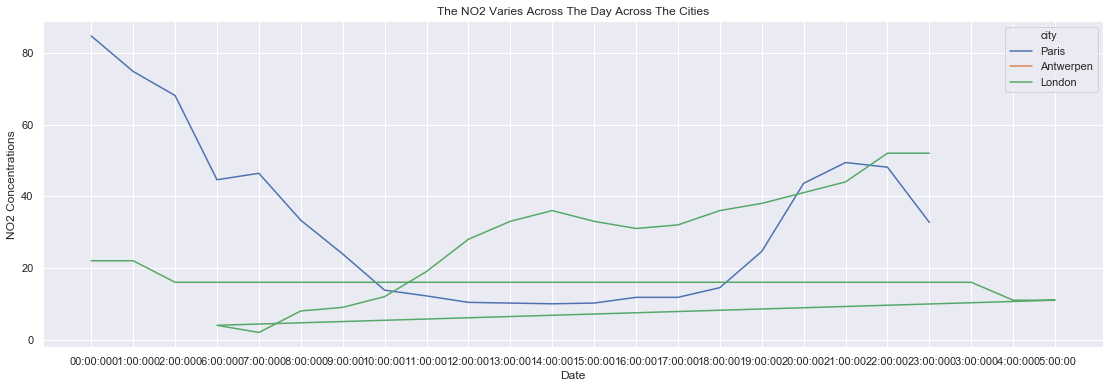

In [87]:
plt.figure(figsize=(19,6))
sns.lineplot(x='time', y='value',hue='city', data=df2)
plt.xlabel('Date')
plt.ylabel('NO2 Concentrations')
plt.title('The NO2 Varies Across The Day Across The Cities')

**Reason:**

-  The line plot was used to study the effect of emissions over a continous range of hours.
-  Both the emission values and dates can be treated as continous variables.And We can see that in Paris, the rate of emissions are maximum during the night than during day time.
-  While at London, the rate of emissions increases linearly with time from day to night. 

### Question 4
<h4> Perform a Descriptive Statistical Analysis of the data set<br>
    Compute basic statistics for all continuous variables

In [88]:
df.describe()

,value,year,month
count,2068.000000,2068.0,2068.000000
mean,26.261847,2019.0,5.392650
std,13.479451,0.0,0.488458
min,0.000000,2019.0,5.000000
25%,17.000000,2019.0,5.000000
50%,25.000000,2019.0,5.000000
75%,33.000000,2019.0,6.000000
max,97.000000,2019.0,6.000000


  ### Question 5
  <h4> Make a plot of daily mean of no2 for each of the cities.<br>

1. The plot should have labels for x axis and y axis.
    
2. Write down your observations in a markdown cell below the visual

Text(0.5, 1.0, 'Plot Of Daily Mean Of NO2 For Each Of The Cities')

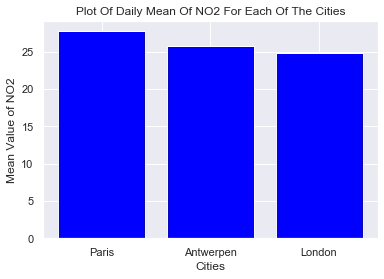

In [89]:
# Make a plot of daily mean of NO2 for each city. 

# list of unique city names
cities = list(df['city'].unique())

no2_values = list() 
for city in cities: 
    # taking mean of NO2 vlues for each cities
    no2_values.append(np.mean(df[df['city']==city]['value']))

plt.bar(cities,no2_values,color = 'blue' ) 
plt.xlabel('Cities') 
plt.ylabel('Mean Value of NO2')
plt.title("Plot Of Daily Mean Of NO2 For Each Of The Cities")

**Observation:** 

- Mean value of Paris has the highest value and London has the lowest value
- Antwerpen is in between Paris and London.

#### Summarize your observations

- Q1) Both City and Country are categorical variables, So we can use Bar plot for that. And the median value of NO2 emission is used to check the relationship between the cities and emissions value.

- Q2) The line plot was used to study the effect of emissions over a continous range of dates. Both the emissions values and dates can be treated as continous variables. So, We can see that Antwerpen has the highest range of emisson values and London has the lowest range of emisson values.

- Q3) The line plot was used to study the effect of emissions over a continous range of hours. Both the emission values and dates can be treated as continous variables.And We can see that in Paris, the rate of emissions are maximum during the night than during day time. While at London, the rate of emissions increases linearly with time from day to night.

- Q4) We used total of 2068 samples of NO2 emissions for our visualization, for that we computed basic stats we concluded that the average NO2 particles in metre cube of volume was 26.261847micro Grams.

- Q5) Mean value of Paris has the highest value and London has the lowest value. Antwerpen is in between Paris and London.

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>